# **BACKPROPAGATION**

O algoritmo mais básico de aprendizado, que facilita a evolução das redes neurais é baseado em uma técnica chamada de *backpropagation*, algoritmo de retropropagação.

Esse algoritmo de aprendizado pode ser resumido, de uma forma bem simples, em três passo:
* Apresentar um ou mais exemplos de treinamento para a rede neural;
* Comparar a saída da rede com o valor desejado (*ground truth*);
* Ajustar os pesos para aproximar a saída do valor desejado.

Foi desse modo que fizemos no algoritmo de aprendizado do perceptron, além de usar a descida do gradiente (*gradient descent*) para saber o quanto ajustar esses pesos. Porém, calcular as derivadas parciais de um único neurônio, no caso do perceptron, é trivial, o desafio pode ser calcular essas derivadas para uma rede com várias camadas e neurônios nessas camadas.

É para esse desafio que entra a backpropagation, uma maneira mais simples e eficiente de calcular essas derivadas parciais em uma rede neural.

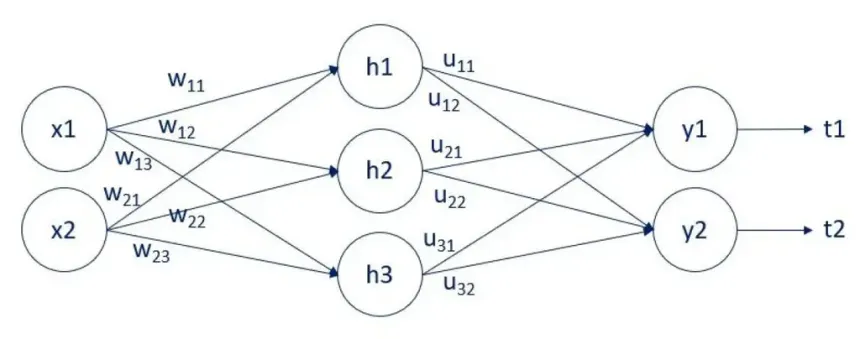 *Exemplo de uma rede com 3 camadas (uma de entrada, uma oculta - hidden layer - e uma de saída) e múltiplos neurônios*

------------------------------------------------------------------------------------------------

# **DESCIDA DO GRADIENTE** (*gradient descent*)

Uma leve pausa para comentar sobre uma parte muito importante para o aprendizado das redes neurais, a **descida do gradiente**.

Antes de começar a falar propriamente da descida do gradiente, começarei falando sobre o **gradiente.**

O gradiente é um conceito fundamental que é apresentado durante os estudos sobre cálculo de funções com várias variáveis. Ele é um vetor que descreve a direção e a taxa da variação mais rápida que se pode ter em um determinado ponto. Uma analogia fácil de entender é se você imaginar que está em um terreno montanhoso, a partir disso, o gradiente no ponto onde você está aponta na direção que tem a subida mais íngreme.

Para uma função de duas variáveis, *f(x,y)*, o gradiente é um vetor composto pelas derivadas parciais da função em relação a cada variável:

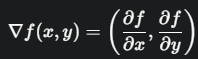 *"Fórmula do gradiente"*

Agora trazendo para o contexto que estamos estudando, a descida do gradiente (*gradient descent*) é um dos algoritmos de otimização mais importantes e utilizados, principalmente dentro do aprendizado de máquina (*Machine Learning*).

A ideia intuitiva da descida do gradiente é a seguinte. Ainda pensando em um terreno montanhoso, imagine agora que você está no topo de uma montanha, você não consegue ver o caminho todo pois o dia está bem nublado. Para descer até o ponto mais baixo, a ideia mais intuitiva seria olhar para os seus próprios pés e dar uma passo em direção a descida mais íngreme. Após fazer isso, repetir essa decisão até chegar ao ponto mais baixo.

A descida do gradiente funciona exatamente assim, o "terreno montanhoso" é a sua função de perda (*loss*) do seu modelo e o "ponto mais baixo" é o lugar onde a sua perda para esse modelo é mínima.

Sabendo que o gradiente "aponta" para o lugar de maior crescimento da função, a descida do gradiente "aponta" para a direção oposta, ou seja, para o lugar de maior queda da função.

Esse algoritmo da descida do gradiente pode ser feito seguindo as seguintes etapas:
1. Inicialização dos parâmetros do modelo (aleatoriamente);
2. A partir desse ponto, escolhido aleatoriamente, calcula-se o gradiente da função de *loss*;
3. Atualiza-se os parâmetros do modelo, dando um "pequeno passo" na direção oposta do gradiente;
4. Repetir os passos 2 e 3 até que o algoritmo convirja.

A atualização dos parâmetros é feita por meio de:

**Novo Parâmetro = Parâmetro Antigo - (Taxa de Aprendizado × Gradiente)**

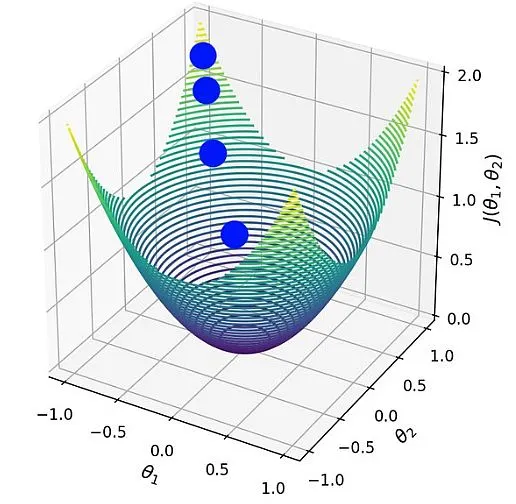 *Exemplificação da descida do gradiente*

-------------------------------------------------------------------

# **DE VOLTA AO BACKPROPAGATION**

O algoritmo de backpropagation consiste nas seguintes passagens:
* Passagem de ida (*forward pass*): exemplos de treinamentos são apresentados à rede;
* Passagem de volta (*backward pass*): os pesos são ajustados usando o *gradient descent*.

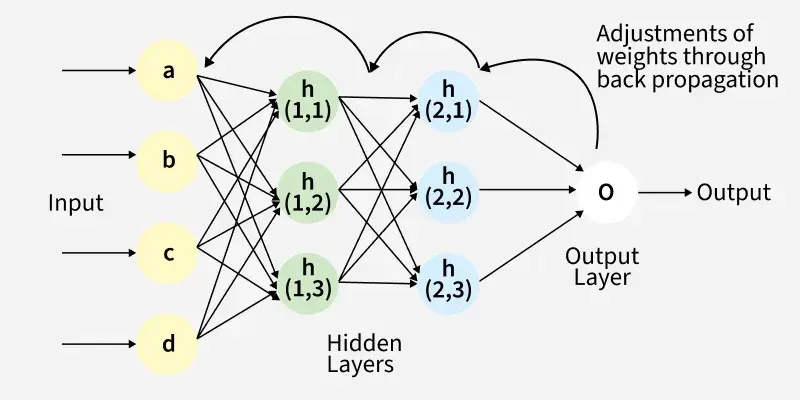

Um requisito importante para aplicar a descida do gradiente é que a função de ativação que estamos usando seja diferenciável, para calcular o gradiente.

## **QUAL FUNÇÃO DE ATIVAÇÃO ESCOLHER?**

Não existe respostas certas ou erradas com relação a isso, a melhor solução é experimentar e escolher a melhor para o seu problema. No entanto, existem heurísticas que podem apontar a direção certa como um ponto de partida.

Como dica:
* Existem diversas funções de ativação, sendo que algumas, não todas, possuem o formato de **S**. Entre as que possuem esse formato, duas famosas são a ***tanh*** (tangente hiperbólica) e a ***função sigmoide logística***. Ao escolher entre essas duas funções, a recmendação é: use a *tanh* para as *hidden layers*, pois a saída é centrada em torno de 0, o que coincide com o threshold da camada seguinte, e a *sigmoide logística* para a camada de saída, pois a saída poderá ser interpretada como uma probabilidade.

## **USANDO BACKPROPAGATION PARA CALCULAR A DESCIDA DO GRADIENTE**

Para demonstrar um exemplo de uso do que foi explicado aqui, usarei a seguinte rede:

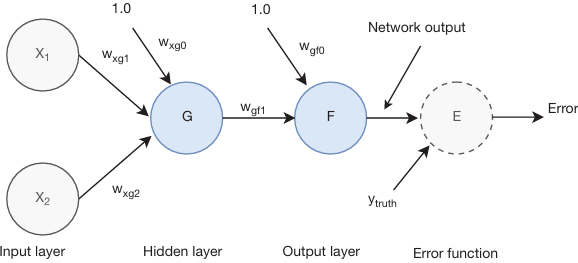 *Rede simples de duas camadas.*

Usando a função de ativação *tanh* para o neurônio **G** e a *sigmoide* para o neurônio **F**, podemos expressar nossa rede de acordo com a seguinte função:

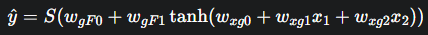 *A notação presente nos pesos, como wxg1, representa o peso que vai da camada representada pela primeira letra, nesse caso a camada x, para a camada da segunda letra, nesse caso a G.*

Como comentado nesse material, o algoritmo da descida do gradiente pode ser usado para minimizar uma função. Para usarmos esse algoritmos, definiremos uma função que queremos minimizar, a **função da perda** (**loss function**), ela deve possuir a propriedade de que, se ela for minimizada, a rede produzirá os resultados que queremos, ou os mais próximos deles.

Uma função de perda muito usada é a *mean squared error (MSE)*, em português erro quadrático médio (EQM), ela é conhecida pois é bastante usada quando se estuda sobre regressão linear. Para calculá-la, pega cada exemplo de apredizado, subtrai o valor predito pela rede do valor correto (*ground truth*) e eleva esse diferença ao quadrado. Após isso, faz o somatório de todos os valores e divide pela quantidade de exemplos. Matematicamente, pode ser descrita como:

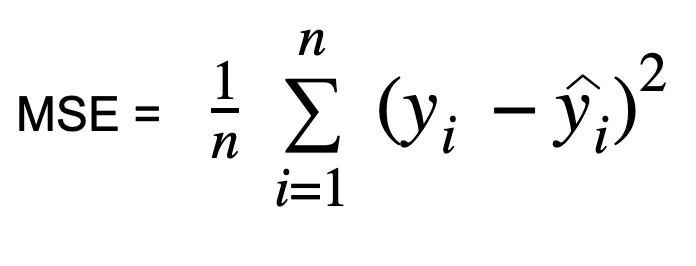 *Sendo o y chapéu o valor predito pela rede e o y o ground truth.*

A seguinte função combina a fórmula do EQM com a função da rede, assim conseguimos a função de perda (*loss function*) que queremos minimizar para um único exemplo de treinamento:

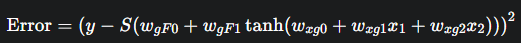

Para minimizar esse função por meio da descida do gradiente devemos:
1. Calcular o gradiente da função de perda em relação aos nossos pesos;
2. Multiplicar pela taxa de aprendizado (*learning rate*);
3. Subtrair esse valor do valor inicial dos pesos.

Por meio da fórmula descrita acima, conseguimos observar que a função de perda é uma função composta. Decompondo a nossa função em expressões menores, por exemplo, a função que calcula a entrada para a função de ativação do neurônio **G**:


A função de ativação do neurônio **G**:



A função que calcula a entrada da função ativação do neurônio **F**:



A função de ativação do neurônio **F**:

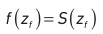

Por último, a função de perda:

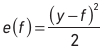 *Adição do 2 no denominador para simplifcar o resultado final. Isso não irá afetar a minimização da função.*

Reescrevendo a função como função composta disso acima, temos:



Calculando as derivadas parciais, temos:

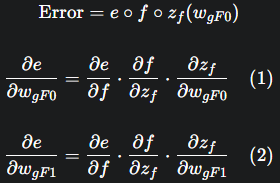 *Nesse caso as funções g e zg são tratadas com constantes.*

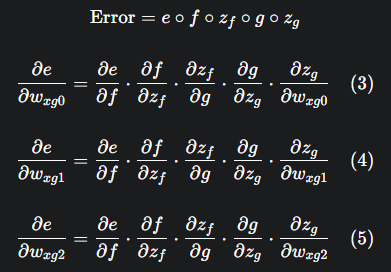

Algo que fica evidente ao observar essas derivadas parciais é a quantidade de subexpressões em comum. A partir disso, notamos o por que do algoritmo de *backpropagation* ser eficiente para o cálculo do gradiente. Pois, em vez de calcular todas essas subexpressões todas as vezes, elas são calculadas uma vez só e depois reutilizada para cada derivada parcial onde for necessária.

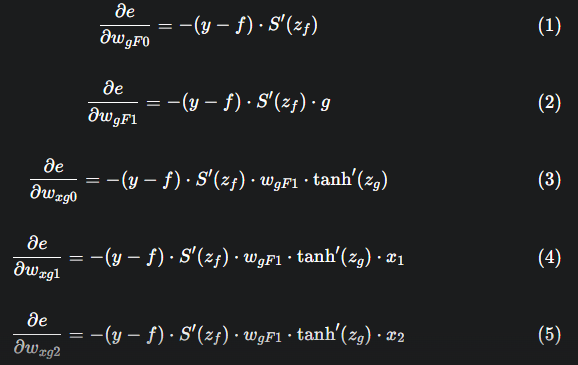 *Todas as derivadas parciais do gradiente.*

Olhando as derivadas parciais, nota-se um padrão. Elas começam com a derivada da função de perda, que é multiplicada pela derivada da função de ativação do neurônio de saída. Esse produto é chamado de **erro para o neurônio de saída**. 
Passando pra camada anterior, pega-se o erro no neurônio de saída, explicado acima, multiplica pelo peso que o conecta ao neurônio anterior e multiplica pela derivada da função de ativação do neurônio anterior. Isso é chamado de **erro do neurônio anterior**. Esse cálculos propagam o erro para trás, da saída da rede em direção ao início dela, daí que vem o nome do algoritmo de ***backpropagation***

**AS DUAS PASSAGENS DO ALGORITMO:**

Como dito anteriormente, o processo se divide em duas partes:
1. Passagem de Ida (Forward Pass): Começamos aplicando o exemplo de entrada à rede para calcular o erro atual. Durante esta passagem, também armazenamos as saídas (y) de todos os neurônios, pois as usaremos na passagem de volta.
2. Passagem de Volta (Backward Pass): Em seguida, iniciamos a passagem de volta, na qual propagamos o erro para trás e calculamos e armazenamos um termo de erro para cada neurônio. Precisamos da derivada para calcular este termo, e ela pode ser computada a partir da saída armazenada (y) do neurônio. Finalmente, usamos este termo de erro juntamente com os valores de entrada da camada para calcular as derivadas parciais que são usadas para ajustar os pesos.

# **EXEMPLO PROGRAMAÇÃO: FUNÇÃO XOR**

Para resolver o problema do XOR, usaremos a rede de três neurônios apresentada no outro material.

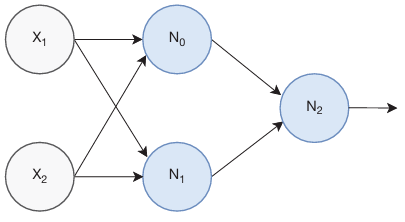

Usarei a *tanh* como função de ativação dos neurônios *N0* e *N1* e a função *sigmoide* para o neurônio de saída *N2*. A *loss function* usada é a *MSE* apresentada acima.

## Código de inicialização do exemplo XOR

In [8]:
import numpy as np

np.random.seed(3)
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3]

#Definição dos exemplos de treinamento
x_train = [np.array([1.0, -1.0, -1.0]),
           np.array([1.0, -1.0, 1.0]),
           np.array([1.0, 1.0, -1.0]),
           np.array([1.0, 1.0, 1.0])]

#Definição dos rótulos de treinamento (ground truth)
y_train = [0.0, 1.0, 1.0, 0.0]

## Variáveis necessárias para mapear os estados dos neurônios

In [9]:
def neuron_w(input_count):
    weights = np.zeros(input_count + 1)
    for i in range(1, (input_count + 1)):
        weights[i] = np.random.uniform(-1.0, 1.0)
    return weights

n_w = [neuron_w(2), neuron_w(2), neuron_w(2)]
n_y = [0, 0, 0]
n_error = [0, 0, 0]

## Funções auxiliares para a *backpropagation*

In [10]:
def show_learning():
    print('Current weights:')
    for i, w in enumerate(n_w):
        print('neuron ', i,  ': w0 =', '%5.2f' % w[0], 
              ', w1 =', '%5.2f' % w[1], ', w2 =', 
              '%5.2f' % w[2])    
    print('----------------')

def forward_pass(x):
    global n_y
    n_y[0] = np.tanh(np.dot(n_w[0], x)) #Neurônio 0
    n_y[1] = np.tanh(np.dot(n_w[1], x)) #Neurônio 1
    n2_inputs = np.array([1.0, n_y[0], n_y[1]]) #1.0 é o bias
    z2 = np.dot(n_w[2], n2_inputs)
    n_y[2] = 1.0 / (1.0 + np.exp(-z2))

def backward_pass(y_truth):
    global n_error
    error_prime = -(y_truth - n_y[2]) #Derivada da loss function
    derivative = n_y[2] * (1.0 - n_y[2]) #Derivada da sigmoid
    n_error[2] = error_prime * derivative
    derivative = 1.0 - n_y[0]**2 #Derivada da tanh
    n_error[0] = n_w[2][1] * n_error[2] * derivative
    derivative = 1.0 - n_y[1]**2 #Derivada da tanh
    n_error[1] = n_w[2][2] * n_error[2] * derivative

def adjust_weights(x):
    global n_w
    n_w[0] -= (x * LEARNING_RATE * n_error[0])
    n_w[1] -= (x * LEARNING_RATE * n_error[1])
    n2_inputs = np.array([1.0, n_y[0], n_y[1]]) # 1.0 é o bias
    n_w[2] -= (n2_inputs * LEARNING_RATE * n_error[2])

## *Loop* de treinamento para aprender a função XOR com a *backpropagation*

In [12]:
#Loop para treinar a rede neural
all_correct = False
while not all_correct: #Treinar a rede até convergir
    all_correct = True
    np.random.shuffle(index_list) #Aleatorizar a ordem dos exemplos
    for i in index_list: # Percorrer todos os exemplos de treinamento
        forward_pass(x_train[i])
        backward_pass(y_train[i])
        adjust_weights(x_train[i])
        show_learning() #Mostrar a atualização dos pesos
    for i in range(len(x_train)): #Checar se a rede aprendeu corretamente
        forward_pass(x_train[i])
        print('x1 =', '%4.1f' % x_train[i][1], ', x2 =',
        '%4.1f' % x_train[i][2], ', y =', 
        '%.4f' % n_y[2])
        if(((y_train[i] < 0.5) and (n_y[2] >= 0.5)) or ((y_train[i] >= 0.5) and (n_y[2] < 0.5))):
            all_correct = False

Current weights:
neuron  0 : w0 =  0.69 , w1 =  0.78 , w2 =  0.76
neuron  1 : w0 =  0.40 , w1 = -0.58 , w2 = -0.56
neuron  2 : w0 = -0.44 , w1 =  1.02 , w2 =  0.88
----------------
Current weights:
neuron  0 : w0 =  0.70 , w1 =  0.77 , w2 =  0.77
neuron  1 : w0 =  0.41 , w1 = -0.59 , w2 = -0.55
neuron  2 : w0 = -0.43 , w1 =  1.02 , w2 =  0.89
----------------
Current weights:
neuron  0 : w0 =  0.70 , w1 =  0.77 , w2 =  0.77
neuron  1 : w0 =  0.40 , w1 = -0.59 , w2 = -0.56
neuron  2 : w0 = -0.45 , w1 =  1.01 , w2 =  0.89
----------------
Current weights:
neuron  0 : w0 =  0.71 , w1 =  0.77 , w2 =  0.76
neuron  1 : w0 =  0.41 , w1 = -0.59 , w2 = -0.57
neuron  2 : w0 = -0.44 , w1 =  1.01 , w2 =  0.90
----------------
x1 = -1.0 , x2 = -1.0 , y = 0.4244
x1 = -1.0 , x2 =  1.0 , y = 0.6306
x1 =  1.0 , x2 = -1.0 , y = 0.6277
x1 =  1.0 , x2 =  1.0 , y = 0.4976


Essas últimas 4 linhas mostram a saída prevista para cada combinação de **x1**, **x2**. Nota-se que o aprendizado da rede para a função XOR convergiu, já que a saída é maior que 0,5 quando apenas uma das entradas é positiva. Isso tudo considerando o nosso limiar (*threshold*) como 0,5.